# Project: No-show Appointments Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing data associated with the no-show medical appointments. In particular, we'll be interested in finding what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.

*This dataset is available from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). *

In [287]:
# Import Packages for anlaysis 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import calendar
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [288]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [289]:
df.shape

(110527, 14)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Dataset overview**  

This dataset contains 110,527 medical appointments with its 14 associated variables (characteristics).   

| Variables            	| Explaination                                                                                                      	| Missing Values 	| Data Types 	|
|----------------------	|-------------------------------------------------------------------------------------------------------------------	|----------------	|------------	|
| PatientId            	| Identification of a patient                                                                                       	| 0              	| float      	|
| AppointmentID        	| Identification of each appointment                                                                                	| 0              	| int        	|
| Gender               	| Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 	| 0              	| string     	|
| DataMarcacaoConsulta 	| The day of the actuall appointment, when they have to visit the doctor.                                           	| 0              	| string     	|
| DataAgendamento      	| The day someone called or registered the appointment, this is before appointment of course.                       	| 0              	| string     	|
| Age                  	| How old is the patient.                                                                                           	| 0              	| int        	|
| Neighbourhood        	| Where the appointment takes place.                                                                                	| 0              	| string     	|
| Scholarship          	| True of False                                                                                                     	| 0              	| int        	|
| Hipertension         	| True or False                                                                                                     	| 0              	| int        	|
| Diabetes             	| True or False                                                                                                     	| 0              	| int        	|
| Alcoholism           	| True or False                                                                                                     	| 0              	| int        	|
| Handcap              	| True or False                                                                                                     	| 0              	| int        	|
| SMS_received         	| 1 or more messages sent to the patient.                                                                           	| 0              	| int        	|
| No-show              	| True or False.  True for no-show and False for showed-up                                                                                                  	| 0              	| string     	|

In [291]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [292]:
# Drop the column will not use and Lower the column names 
df.drop(['Handcap','Neighbourhood','Scholarship','AppointmentID'], axis =1, inplace = True)
df.rename(columns = lambda x: x.lower().replace("-","_"), inplace = True)

In [293]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,hipertension,diabetes,alcoholism,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,No


In [294]:
# Get number of duplicated rows 
sum(df.duplicated())

618

In [295]:
df.drop_duplicates(inplace = True)

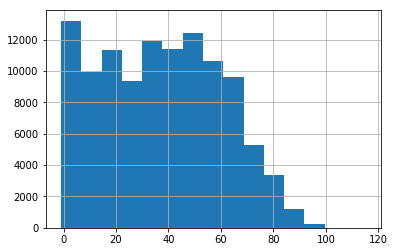

In [296]:
# Clean the age features cause it has minimum age of -1 and maximum 115
df.age.hist(bins = 15)

In [297]:
# Drop the records of age == 1 
df.drop((df.query('age == -1')).index[0], inplace = True)

In [298]:
# Change the appointment and shcedule variable data type
df.scheduledday = df.scheduledday.apply(lambda x: x[:10])
df.scheduledday = pd.to_datetime(df.scheduledday)


df.appointmentday = pd.to_datetime(df.appointmentday)

In [299]:
# Create a feature to get the days from scheduled day to appointment day
df['days_to_appo'] = df.appointmentday - df.scheduledday
df['days_to_appo'] = df['days_to_appo'].apply(lambda x: x.days)

In [300]:
# Drop the wrong records which the scheduledday is ahead the appoinmentday 
df.drop(df.query('days_to_appo < 0').index, axis =0, inplace = True)

In [301]:
# Get the Weekday information of Appointmentday
df['appo_weekday'] = df.appointmentday.apply(lambda x:  calendar.day_name[x.weekday()] )

In [302]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,hipertension,diabetes,alcoholism,sms_received,no_show,days_to_appo,appo_weekday
0,2.987250e+13,F,2016-04-29,2016-04-29,62,1,0,0,0,No,0,Friday
1,5.589978e+14,M,2016-04-29,2016-04-29,56,0,0,0,0,No,0,Friday
2,4.262962e+12,F,2016-04-29,2016-04-29,62,0,0,0,0,No,0,Friday
3,8.679512e+11,F,2016-04-29,2016-04-29,8,0,0,0,0,No,0,Friday
4,8.841186e+12,F,2016-04-29,2016-04-29,56,1,1,0,0,No,0,Friday


<a id='eda'></a>
## Exploratory Data Analysis

we've trimmed and cleaned the data, now we're ready to move on to exploration. We'll compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### What factors are important to predict if a patient will show up for their scheduled appointment?

**1. Gender**

In [303]:
# first lets see if gender is a factor to impact the no-show pecentage
gender_factor = df.groupby(['gender','no_show'])['no_show'].count().rename('pct')

In [304]:
gender_df = (gender_factor/gender_factor.groupby(level =0).sum()).reset_index()

Text(0,0.5,'No-show percentage')

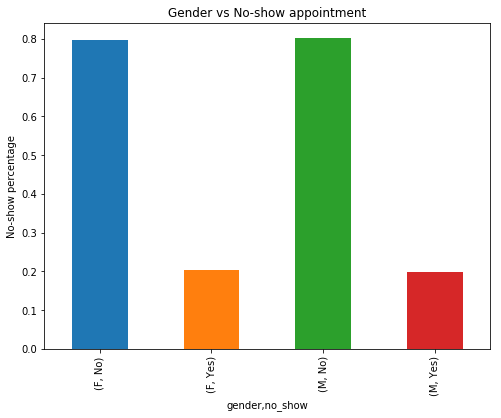

In [424]:
gender_df.groupby(['gender','no_show']).pct.mean().plot(kind='bar',figsize = (8,6))
plt.title("Gender vs No-show appointment")
plt.ylabel('No-show percentage')

Female and male show similar percentage for no-show and show-up appoinments, so we can exclude the gender feature and move to the next one.   

**2.  Age**

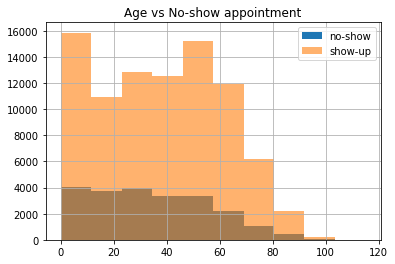

In [327]:
df.age[df.no_show=="Yes"].hist(label ='no-show')
df.age[df.no_show=="No"].hist(alpha = 0.6,label='show-up')
plt.title("Age vs No-show appointment")
plt.legend();

Even though the size of the no-show and show-up are quite differ, we can see that both distribution are skewd to right so we cant conclude the age is a factor contribute the no-show appointment. 

**3.SMS received**

In [427]:
sms_factor = df.groupby(['no_show','sms_received'])['no_show'].count().rename('pct')
sms_df = (sms_factor/sms_factor.groupby(level =0).sum()).reset_index()

Text(0,0.5,'No-show percentage')

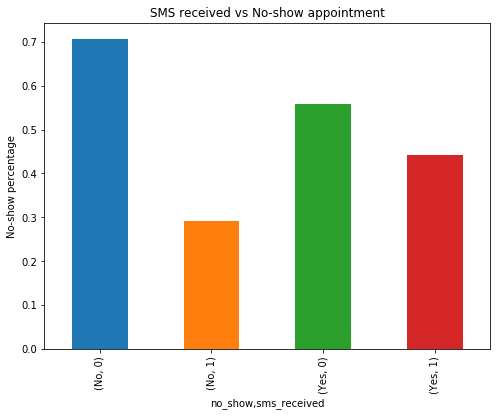

In [428]:
sms_df.groupby(['no_show','sms_received']).pct.mean().plot(kind='bar',figsize = (8,6))
plt.title("SMS received vs No-show appointment")
plt.ylabel('No-show percentage')

we can see that for patients who received messages have larger possiblity to show up for the appointment. So we can conclude that the SMS_received is one of the features.

### Does the weekday would afftect the results? 

In [369]:
weekday_idx = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']

In [415]:
no_show_weekday_pct = (df.query('no_show == "Yes"').groupby(['appo_weekday'])['no_show'].count())\
/ (df.groupby(['appo_weekday'])['no_show'].count())

no_show_weekday_pct = no_show_weekday_pct.reset_index().set_index('appo_weekday').loc[weekday_idx]\
                                         .rename(columns ={"no_show": "no_show_pct"})

Text(0.5,1,'weekday of appointment factor vs no_show_percentage')

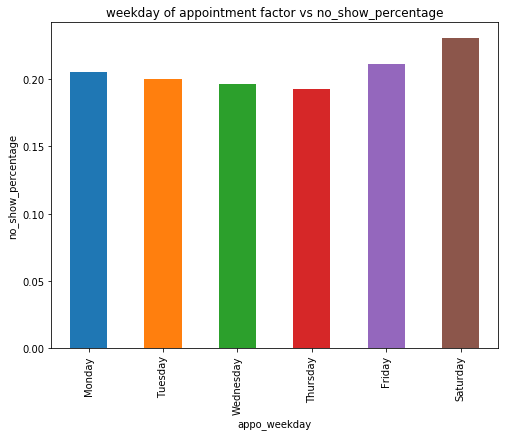

In [426]:
no_show_weekday_pct.no_show_pct.plot(kind = 'bar', figsize = (8,6))
plt.ylabel("no_show_percentage")
plt.title("weekday of appointment factor vs no_show_percentage")

Though we can see the Saturday has a relative higher percentage of the no-show rates, considering the number of person scheduled on Saturday is smaller than rest of the days, we can't see there is a difference in no_show rate of the weekday feature. 

**Rest Boolean Features**

Text(0.5,1,'Diabetes rate vs no_show_percentage')

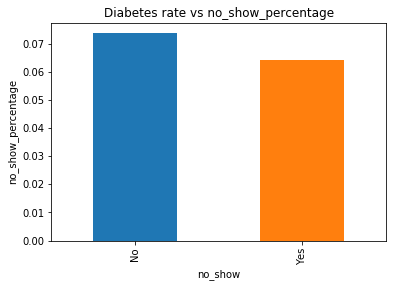

In [435]:
df_diabets = (df.query('diabetes == 1').groupby(['no_show'])['no_show'].count())\
/ (df.groupby(['no_show'])['no_show'].count())
df_diabets.plot(kind='bar')
plt.ylabel("no_show_percentage")
plt.title("Diabetes rate vs no_show_percentage")

Text(0.5,1,'Hipertension rate vs no_show_percentage')

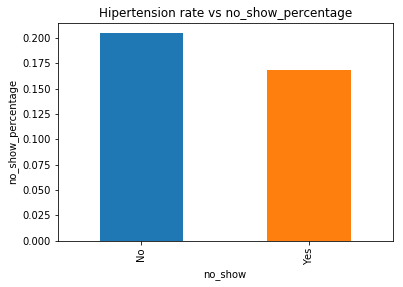

In [436]:
df_hipertension= (df.query('hipertension == 1').groupby(['no_show'])['no_show'].count())\
/ (df.groupby(['no_show'])['no_show'].count())
df_hipertension.plot(kind='bar')
plt.ylabel("no_show_percentage")
plt.title("Hipertension rate vs no_show_percentage")

Text(0.5,1,'Alcoholism rate vs no_show_percentage')

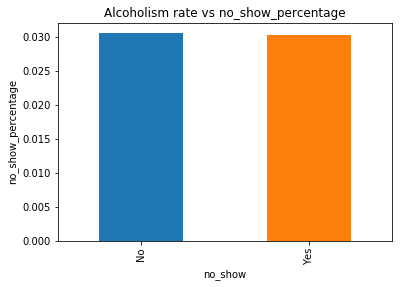

In [437]:
df_alcoholism = (df.query('alcoholism == 1').groupby(['no_show'])['no_show'].count())\
/ (df.groupby(['no_show'])['no_show'].count())
df_alcoholism.plot(kind='bar')
plt.ylabel("no_show_percentage")
plt.title("Alcoholism rate vs no_show_percentage")

We can see that there is no much difference of no_show rate from features Alcoholism/hipertension/diabetes. 

<a id='conclusions'></a>
## Conclusions

We can see that from the only feature we found has the impact for the no_show rate is whether the patient received the SMS message before the appointment. In the next analysis, we may want to look into the co-effect of the combination of several features' impact for the results. 